## The Lattice Plotting System in R

- `xyplot`: main function for creating scatterplots
- `bwplot`: box-and-whiskers plots (boxplots)
- `histogram`
- `stripplot`: like a boxplot but with actual points
- `dotplot`: plot dots on 'violin strings`
- `splom`: scatterplot matrix; like `pairs` in base plotting system
- `levelplot`, `contourplot`: for plotting "image" data

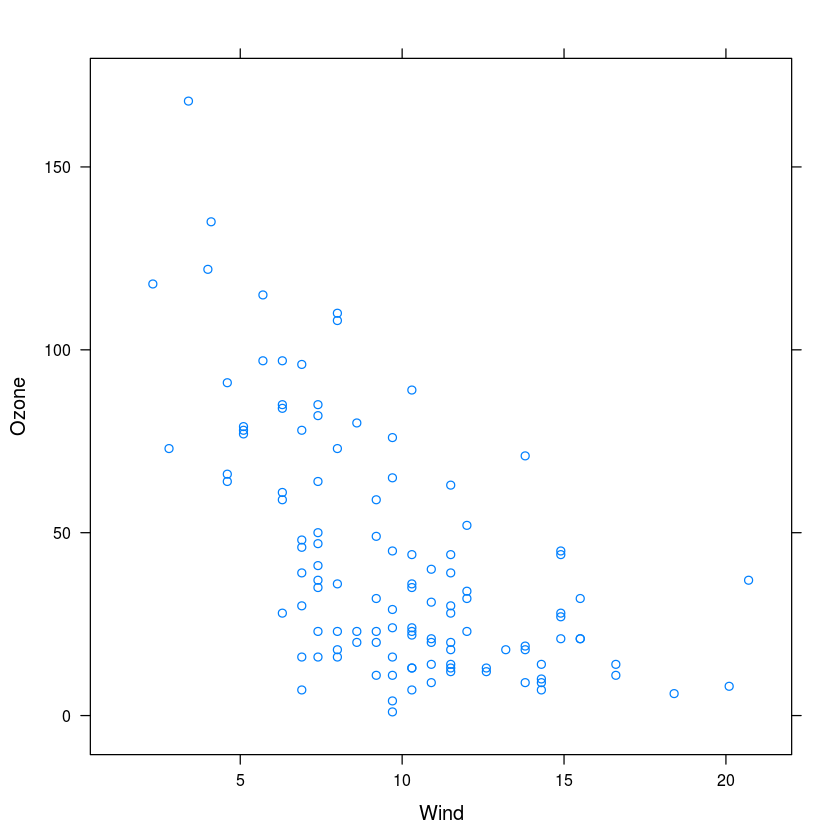

In [1]:
library(lattice)
library(datasets)
xyplot(Ozone ~ Wind, data = airquality)

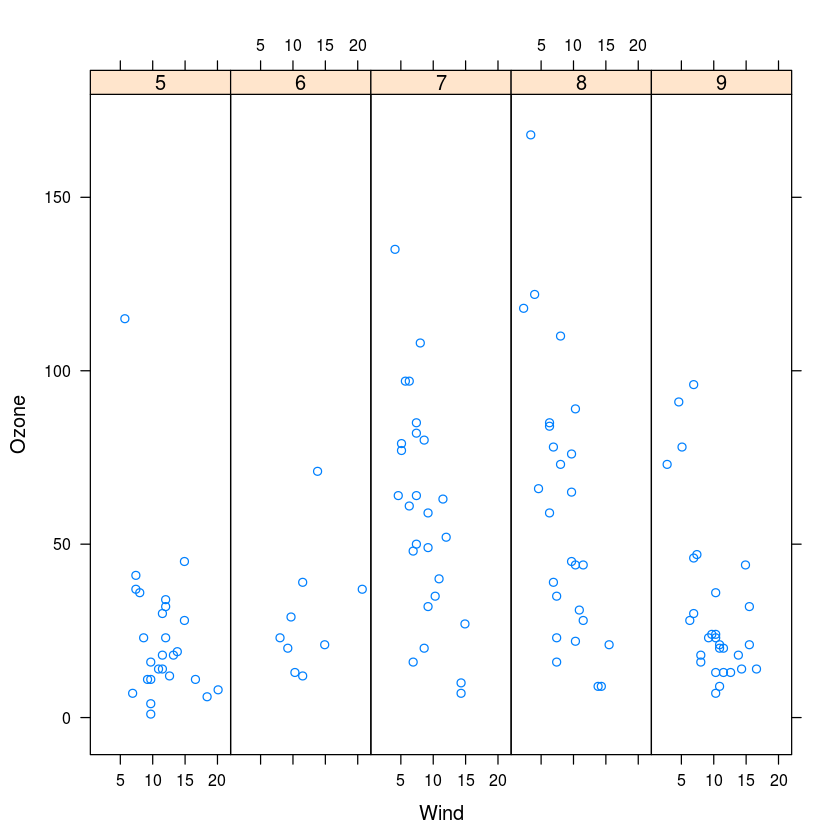

In [3]:
airquality <- transform(airquality, Month = factor(Month))
xyplot(Ozone ~ Wind | Month, data = airquality, layout = c(5,1))

In [4]:
p <- xyplot(Ozone ~ Wind, data = airquality)# Nothing happens!

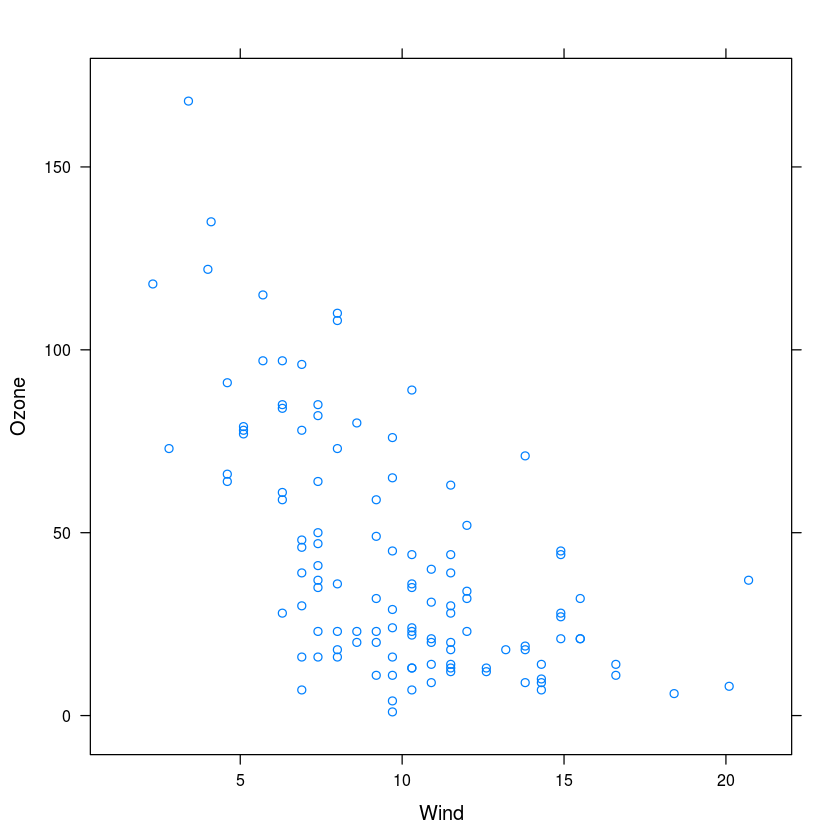

In [5]:
print(p) # Plot appears

### Lattice Panel Functions

In [6]:
set.seed(10)
x <- rnorm(100)
f <- rep(0:1, each = 50)

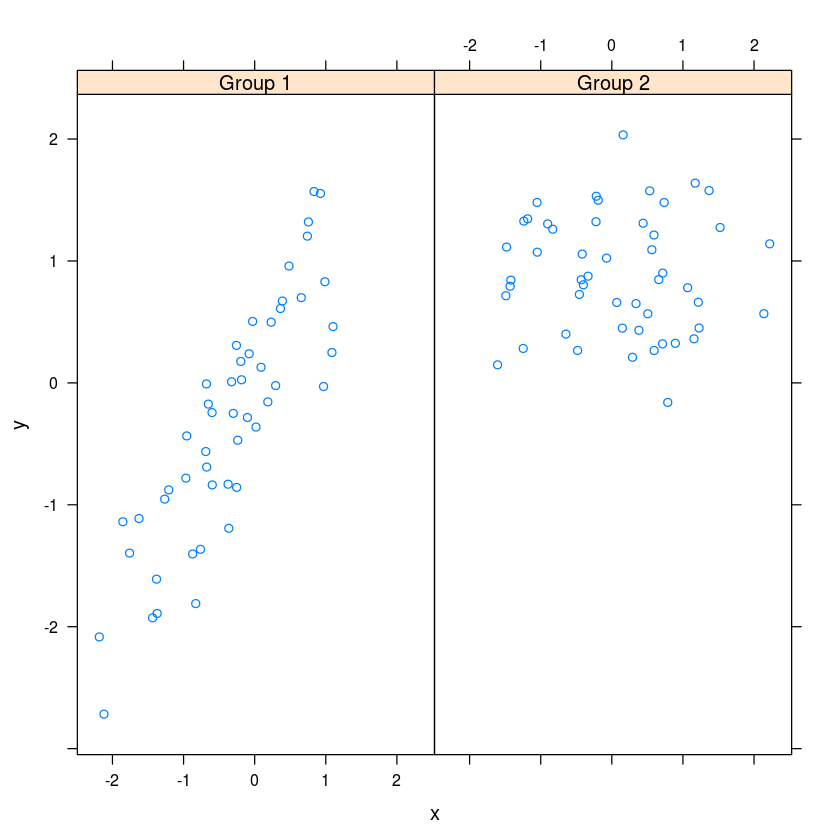

In [9]:
y <- x + f - f * x + rnorm(100, sd = 0.5)
f <- factor(f, labels = c("Group 1", "Group 2"))
xyplot(y ~ x | f, layout = c(2, 1)) # Plot with 2 panels

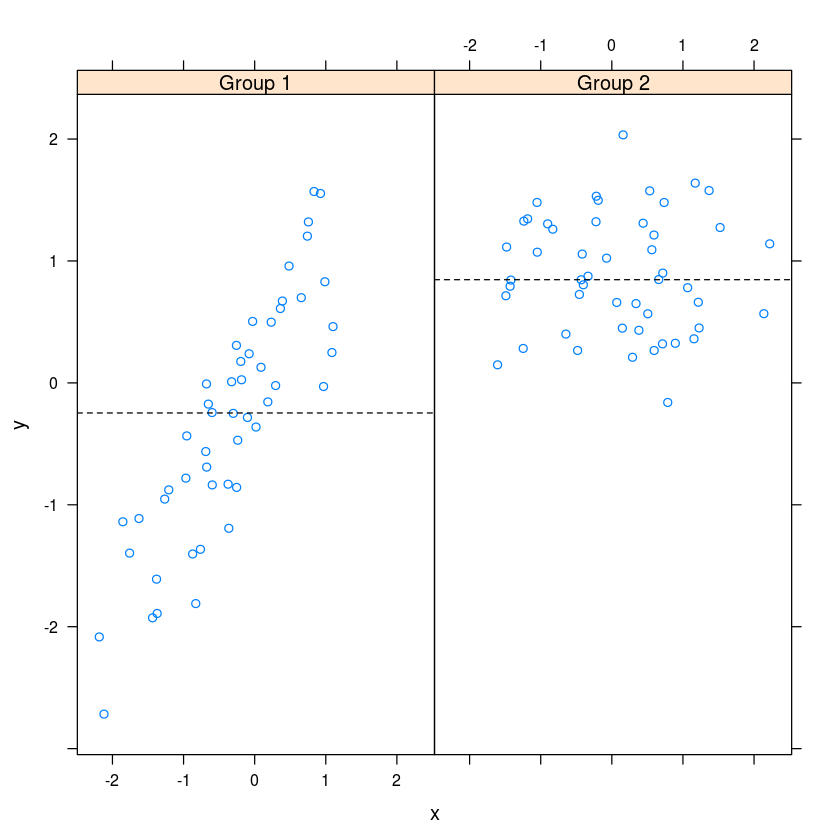

In [11]:
## Custom panel function
xyplot(y ~ x | f, panel = function(x,y,...){
    panel.xyplot(x, y, ...) # first call the default panel function for 'xyplot'
    panel.abline(h = median(y), lty = 2) # Add a horizontal line at the median
})

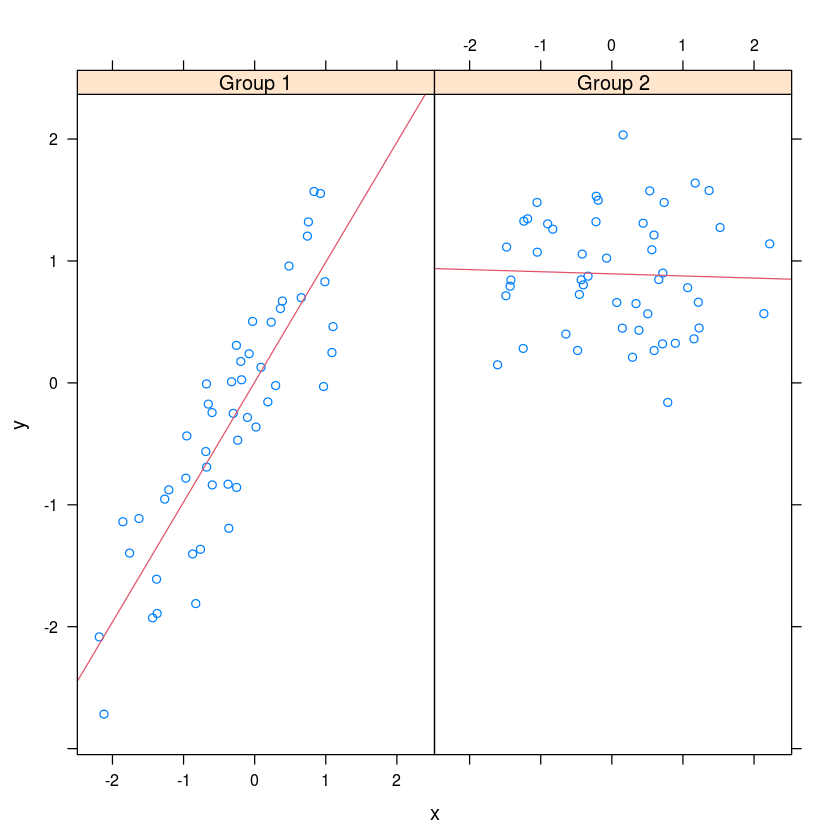

In [15]:
## Custom panel function
xyplot(y ~ x | f, panel = function(x,y,...){
    panel.xyplot(x, y, ...) # first call the default panel function for 'xyplot'
    panel.lmline(x, y, col = 2) # Overlay a simple linear regression line
})

## The ggplot2 Plotting System

### qplot()

- works much like the `plot` function in base graphics system
- looks for data in a dataframe, similar to lattice, or in the parent environment
- Plots are made up of *sesthetics (size, shape, color)* and *geoms (points, lines)*

`ggplot()` is the core function and very flexibile for doing things `qplot()` cannot do

In [17]:
library(ggplot2)
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


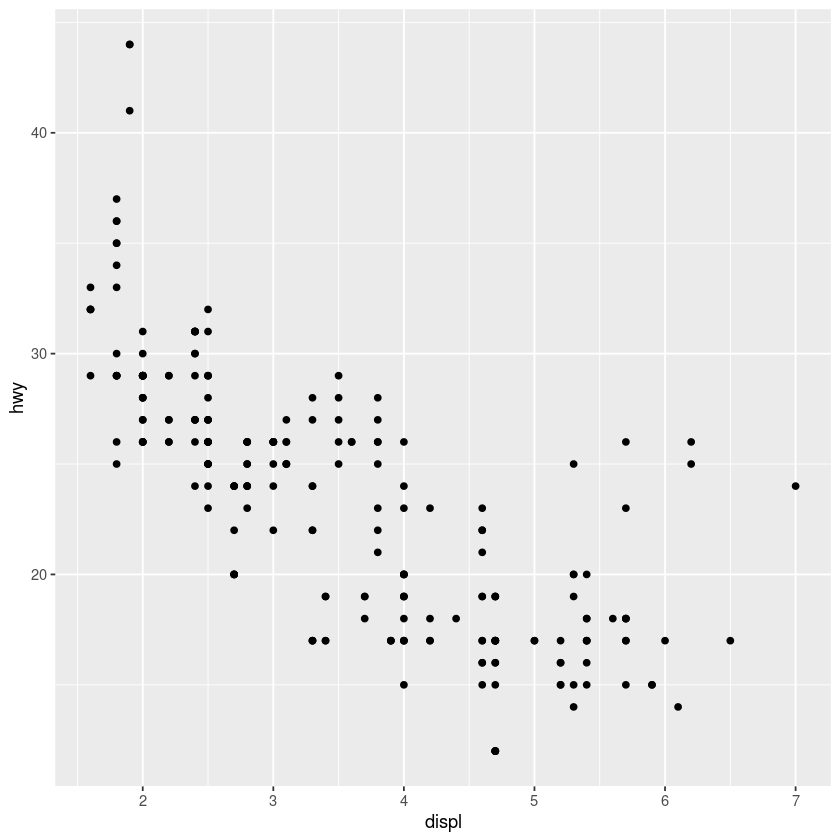

In [18]:
qplot(displ, hwy, data = mpg)

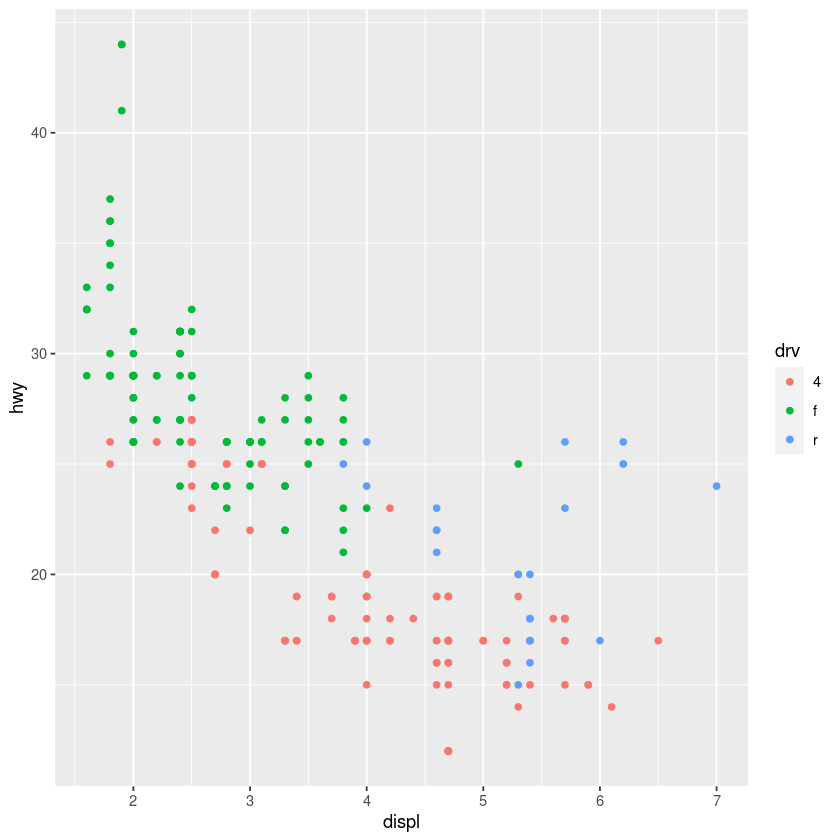

In [19]:
qplot(displ, hwy, data = mpg, color = drv)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



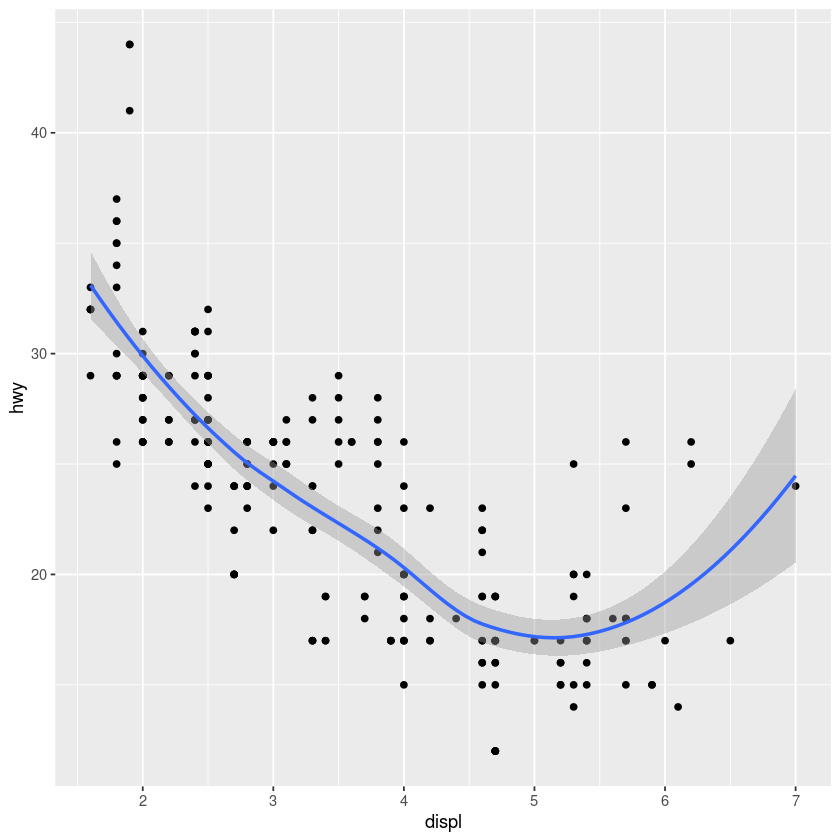

In [20]:
qplot(displ, hwy, data = mpg, geom = c("point", 'smooth'))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



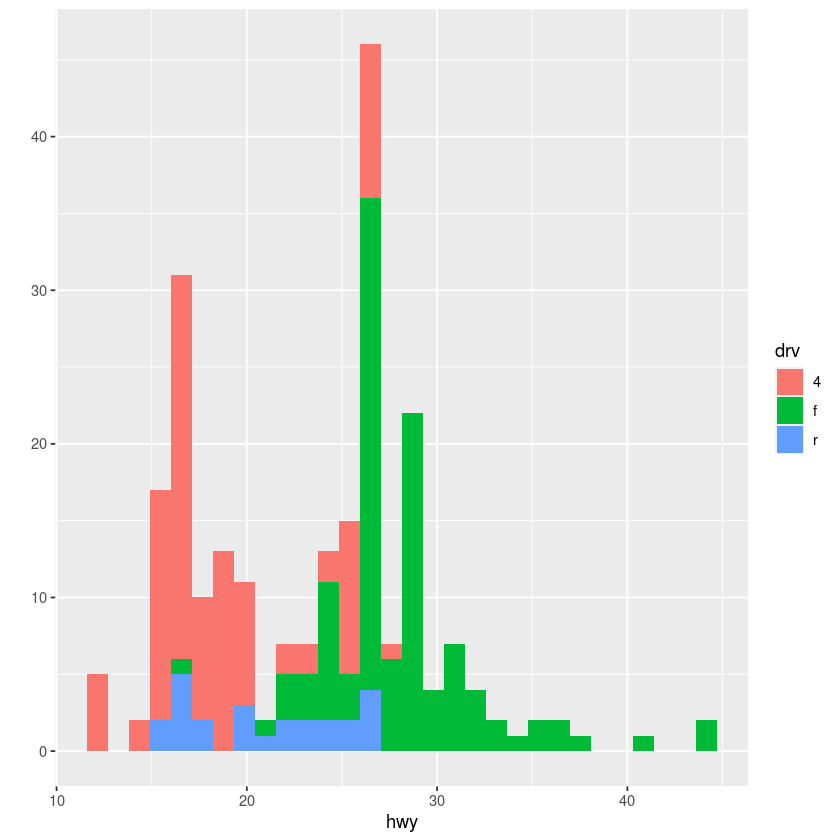

In [22]:
qplot(hwy, data = mpg, fill = drv)

#### Facets
Facets is like panels in lattice system

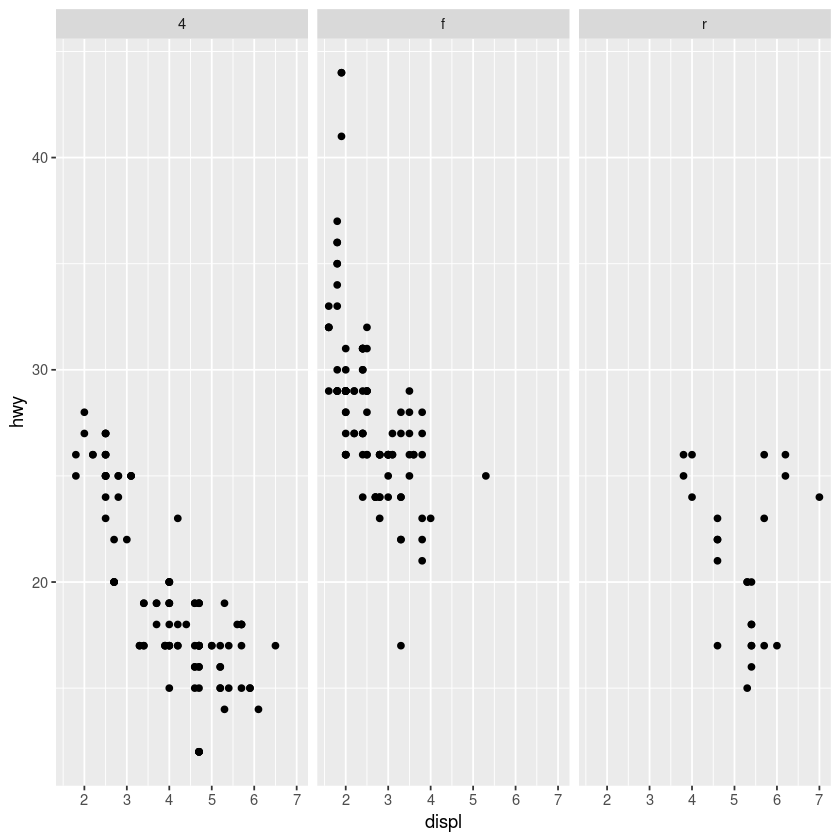

In [24]:
qplot(displ, hwy, data = mpg, facets = .~drv)

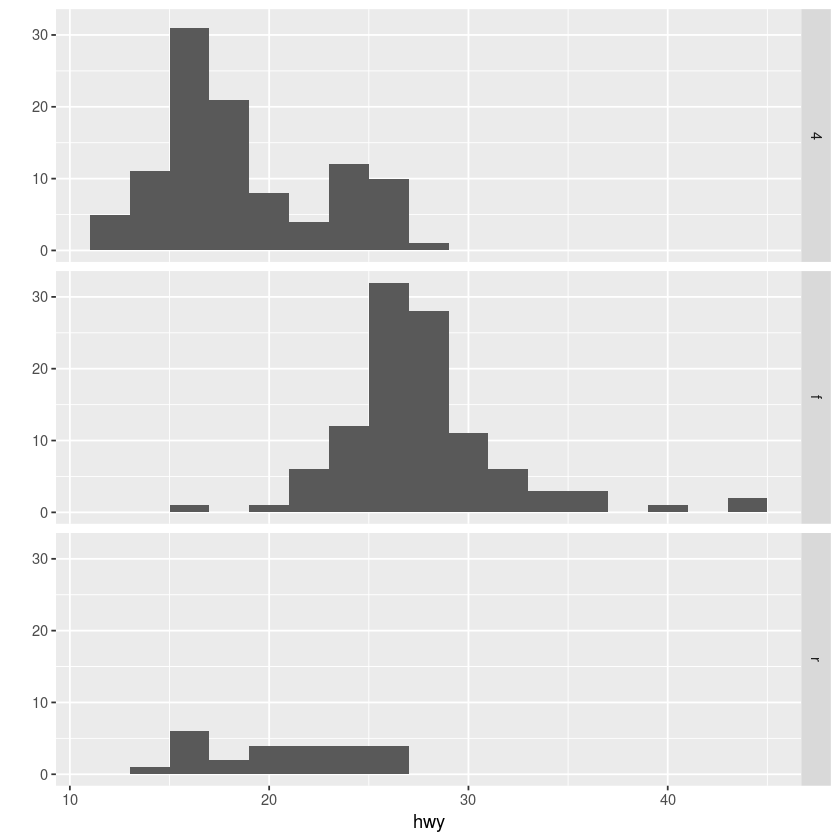

In [27]:
qplot(hwy, data = mpg, facets = drv~., binwidth = 2)

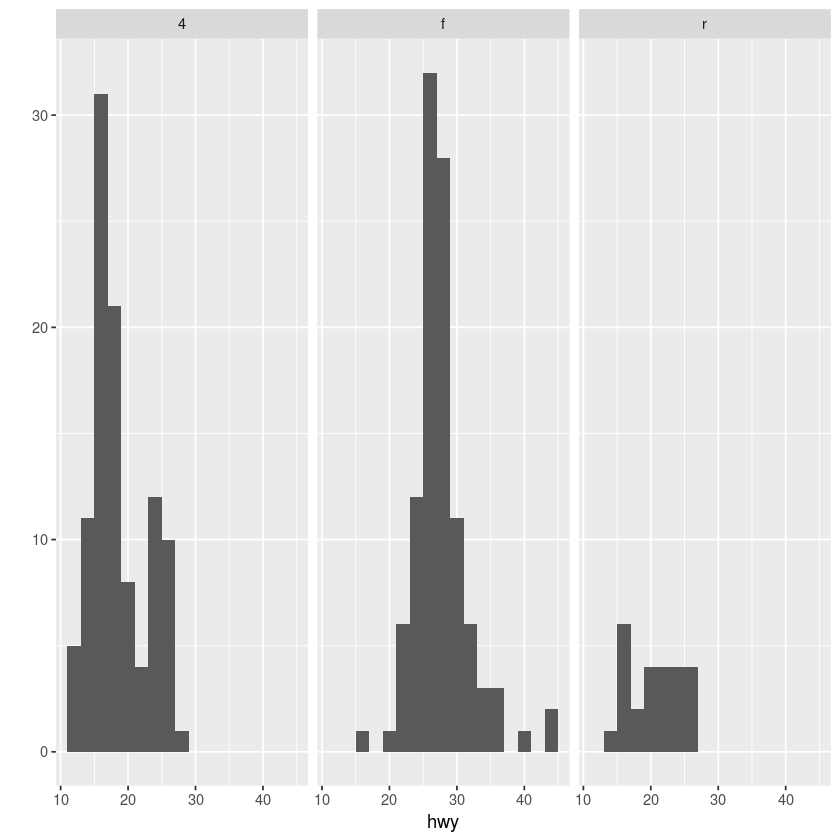

In [28]:
qplot(hwy, data = mpg, facets = .~drv, binwidth = 2)

In [53]:
load(file = './data/maacs.Rda')

In [54]:
str(maacs)

'data.frame':	750 obs. of  5 variables:
 $ id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ eno      : num  141 124 126 164 99 68 41 50 12 30 ...
 $ duBedMusM: num  2423 2793 3055 775 1634 ...
 $ pm25     : num  15.6 34.4 39 33.2 27.1 ...
 $ mopos    : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 108 rows containing non-finite values (stat_bin).”


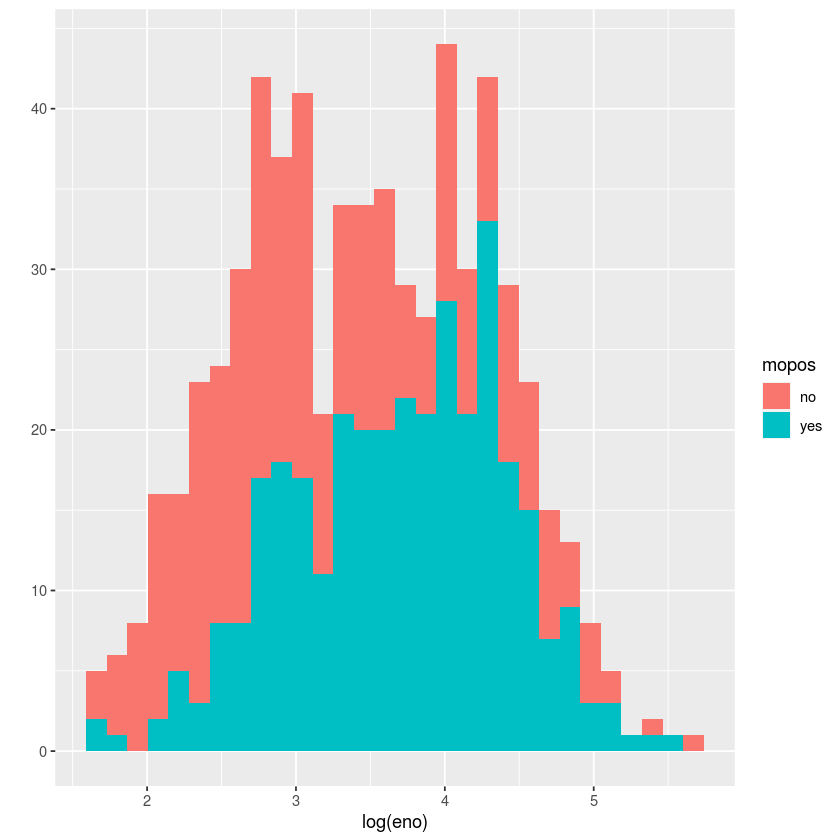

In [34]:
qplot(log(eno), data = maacs, fill = mopos)

Warning message:
“Removed 108 rows containing non-finite values (stat_density).”


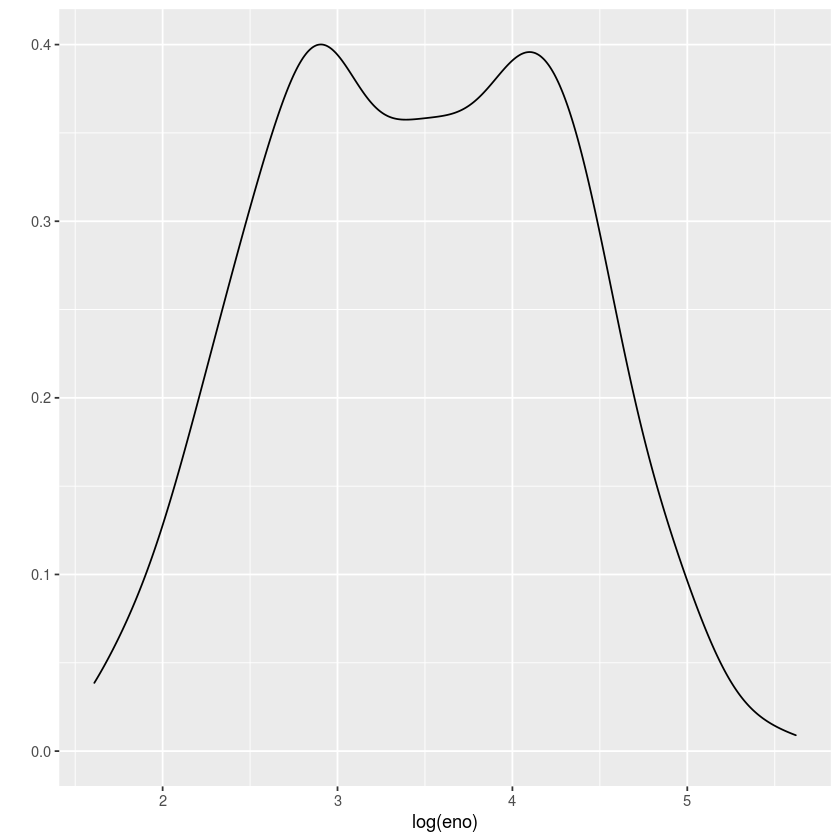

In [36]:
## Density smooth
qplot(log(eno), data = maacs, geom = 'density')

Warning message:
“Removed 108 rows containing non-finite values (stat_density).”


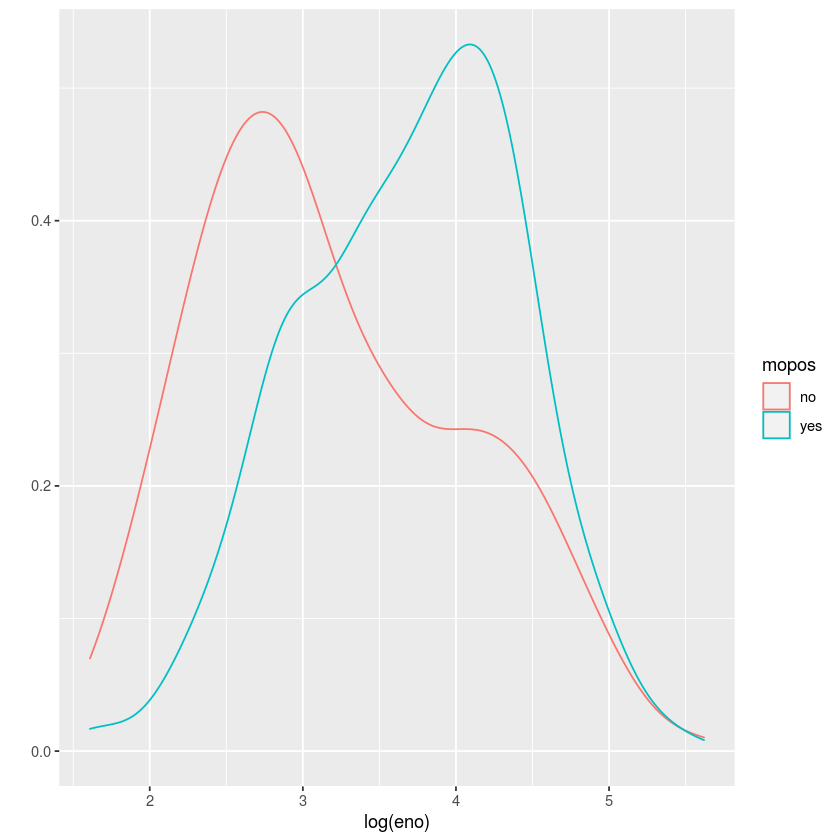

In [41]:
## Density smooth
qplot(log(eno), data = maacs, geom = 'density', color = mopos)

#### Scatterplots: eNO vs. PM2.5

Warning message:
“Removed 184 rows containing missing values (geom_point).”


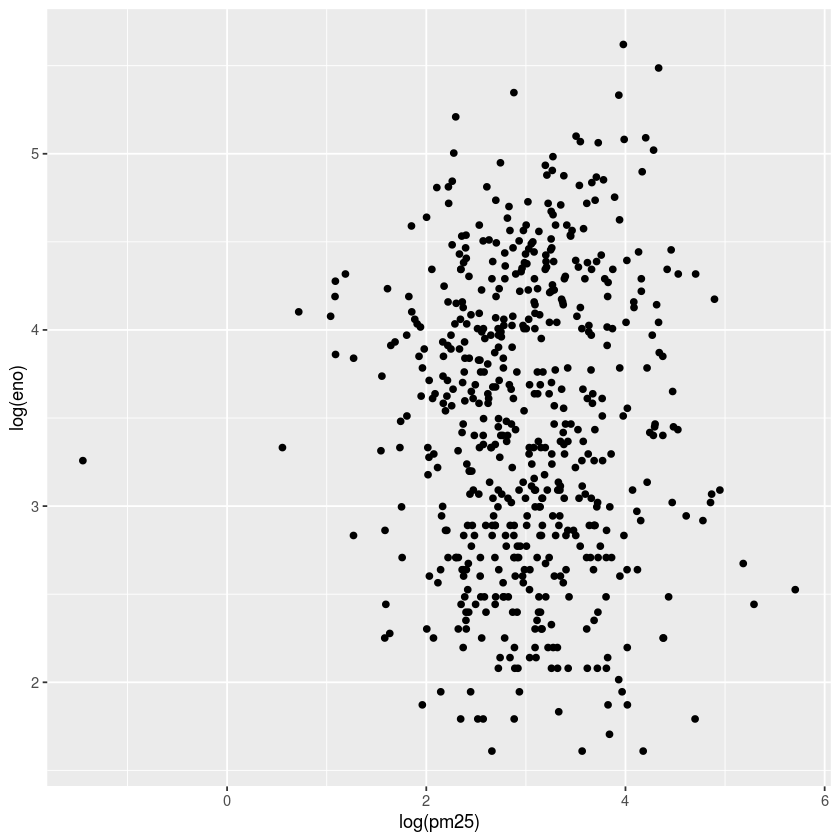

In [42]:
qplot(log(pm25), log(eno), data = maacs)

Warning message:
“Removed 184 rows containing missing values (geom_point).”


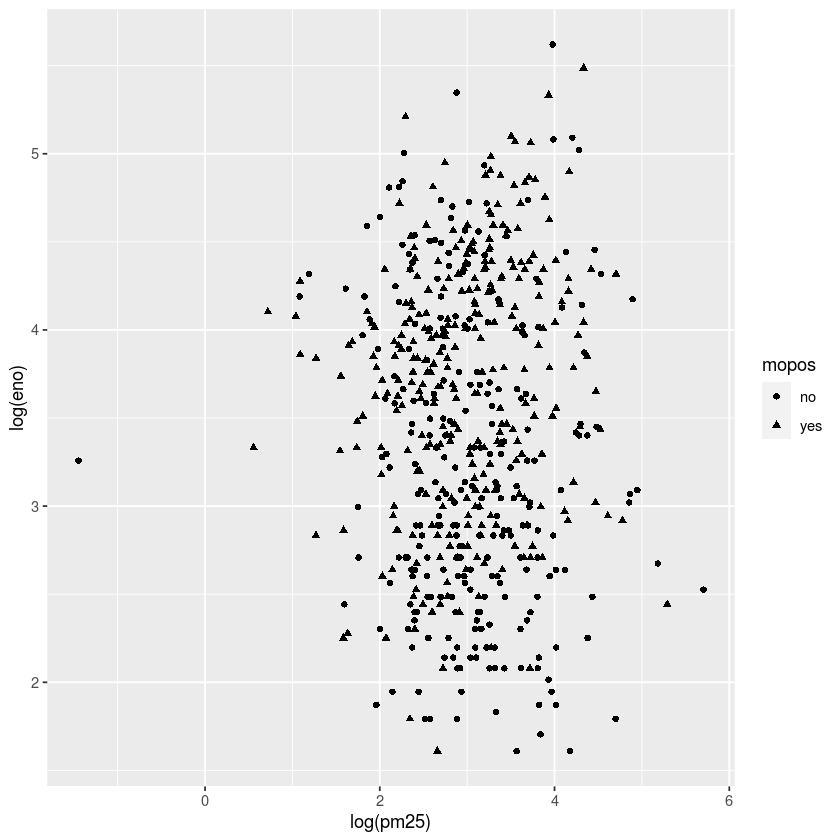

In [43]:
qplot(log(pm25), log(eno), data = maacs, shape = mopos)

Warning message:
“Removed 184 rows containing missing values (geom_point).”


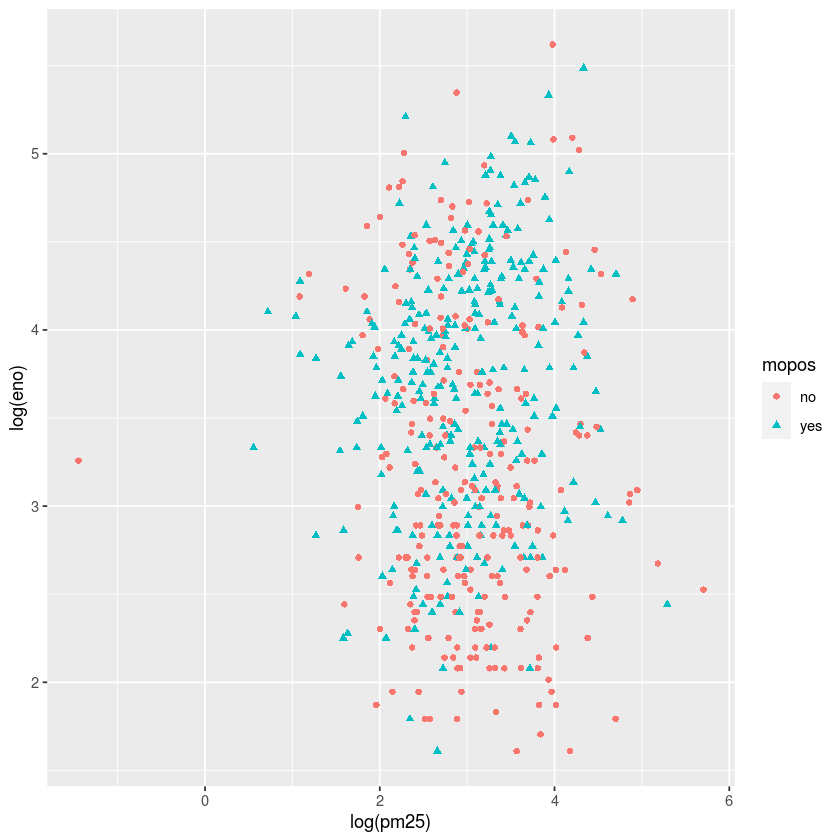

In [44]:
qplot(log(pm25), log(eno), data = maacs, shape = mopos, color = mopos)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 184 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 184 rows containing missing values (geom_point).”


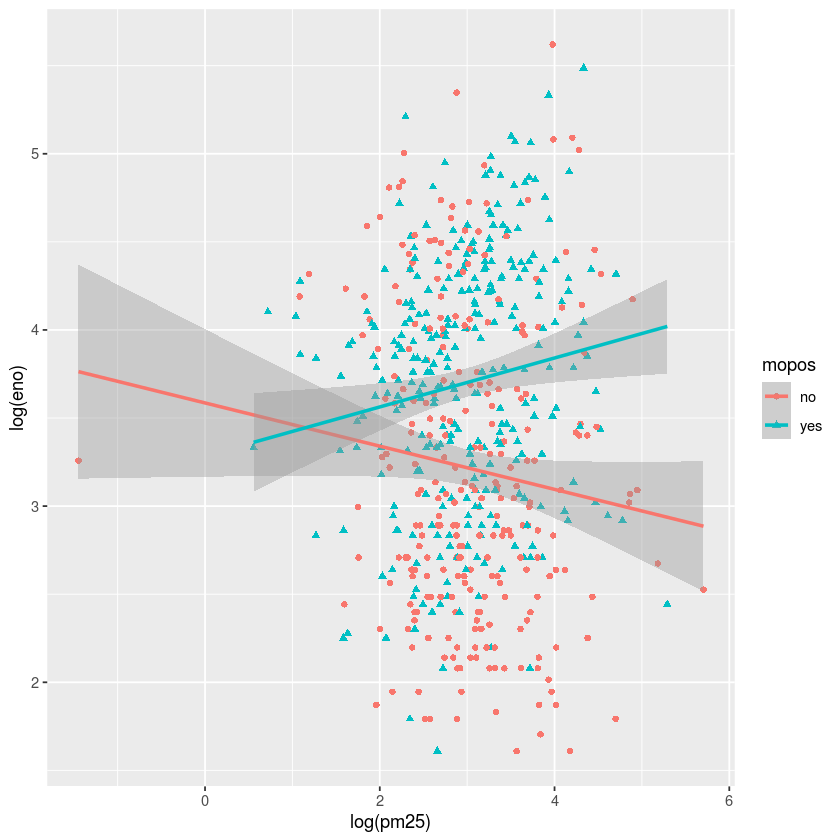

In [46]:
qplot(log(pm25), log(eno), data = maacs, shape = mopos, color = mopos) + geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 184 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 184 rows containing missing values (geom_point).”


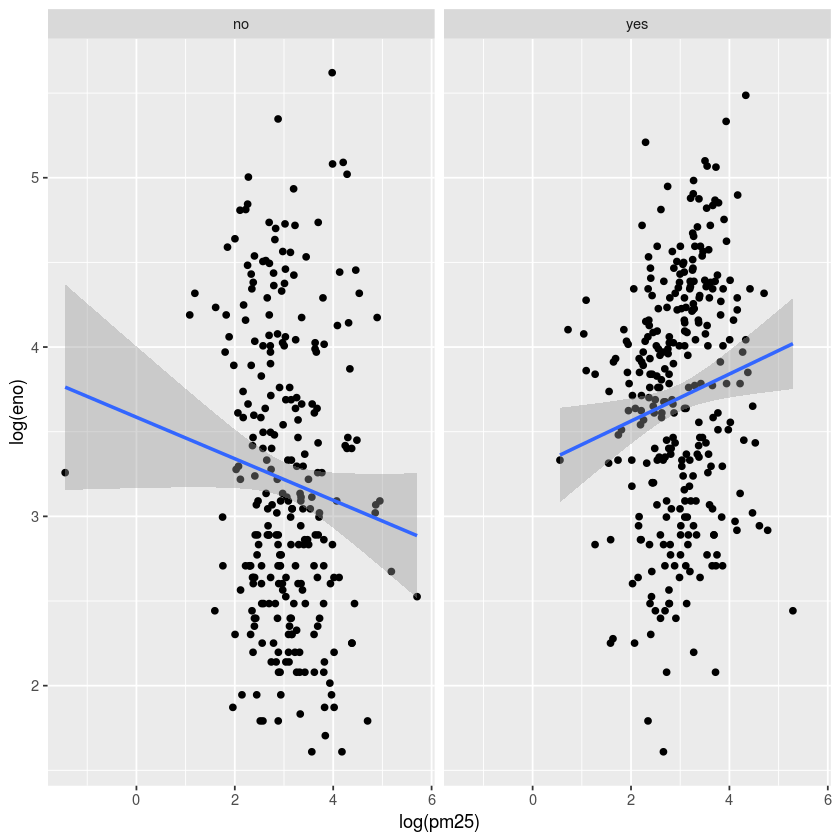

In [50]:
qplot(log(pm25), log(eno), data = maacs, facets = .~mopos) + geom_smooth(method = 'lm')

## ggplot2()

basic components of a ggplot2 plot
- a **data frame**
- **aesthetic mappings**: how data are mapped to color, size
- **geoms**: geometric objects like points, lines, shapes
- **facets**: for conditional plots
- **stats**: statistical transformations like binning, quantiles, smoothing
- **scales**: what scale an aesthetic map uses (e.g. male = red, female = blue)
- **coordinate system**

In [56]:
load('data/maacsFull.Rda')

In [59]:
head(maacs)

,id,eno,duBedMusM,pm25,mopos,logpm25,NocturnalSympt,bmicat,logno2_new
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>
1,1,141,2423,15.560,yes,1.192010,0,normal weight,1.617849
2,2,124,2793,34.370,yes,1.536180,0,overweight,1.884490
3,3,126,3055,38.953,yes,1.590541,2,overweight,1.712953
4,4,164,775,33.249,yes,1.521779,2,normal weight,1.458879
5,5,99,1634,27.060,yes,1.432328,2,normal weight,1.294510
6,6,68,939,18.890,yes,1.276232,2,normal weight,1.468377


In [69]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
# summary(g)

Warning message:
“Removed 134 rows containing missing values (geom_point).”


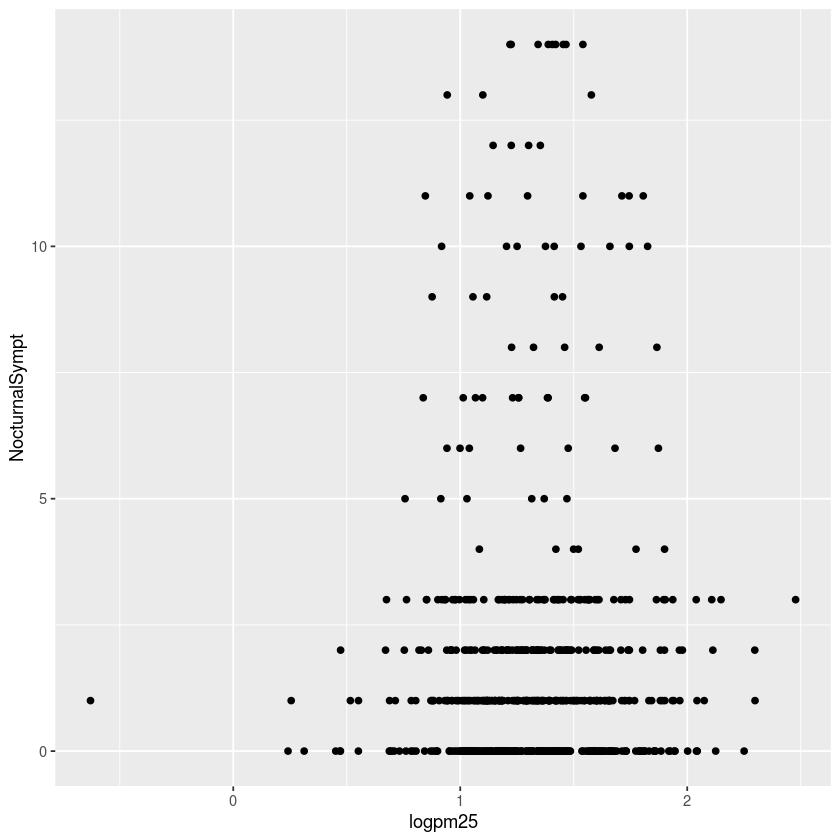

In [67]:
p <- g + geom_point() # explicitly save and print ggplot object
print(p)
# g + geom_point() # Auto-print plot object without saving

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


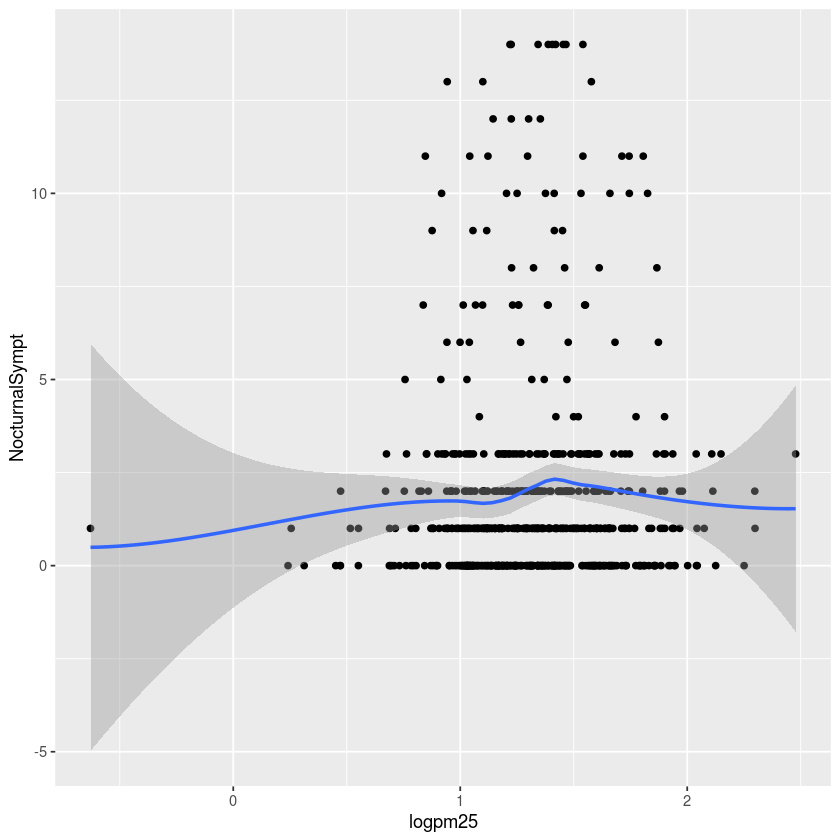

In [70]:
g + geom_point() + geom_smooth()

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


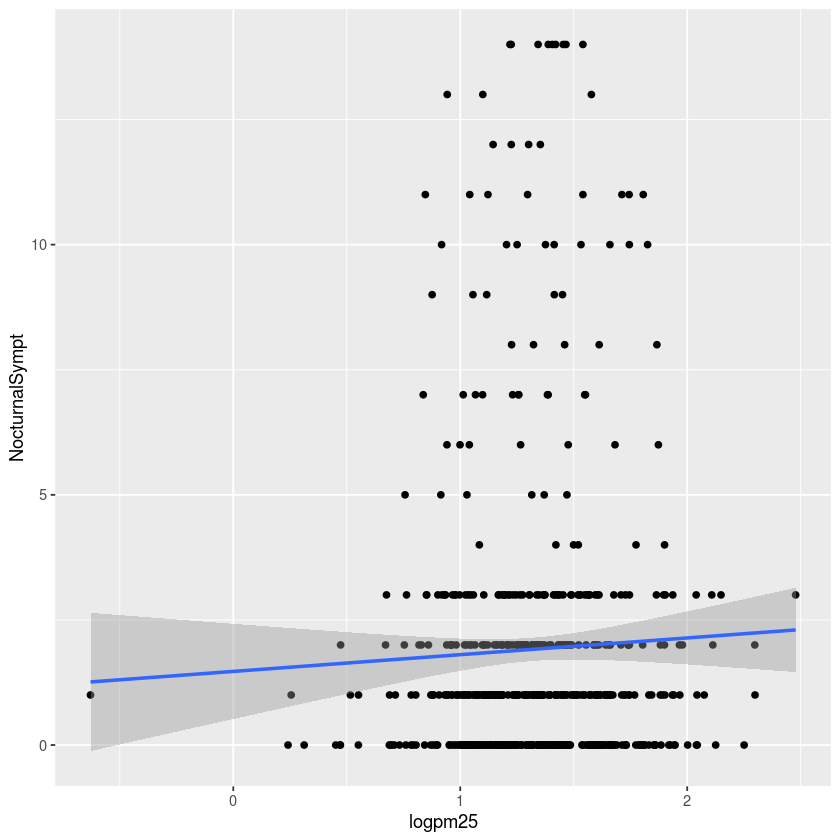

In [71]:
g + geom_point() + geom_smooth(method = 'lm') # 使用OLS回归方式作近似 linear model

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


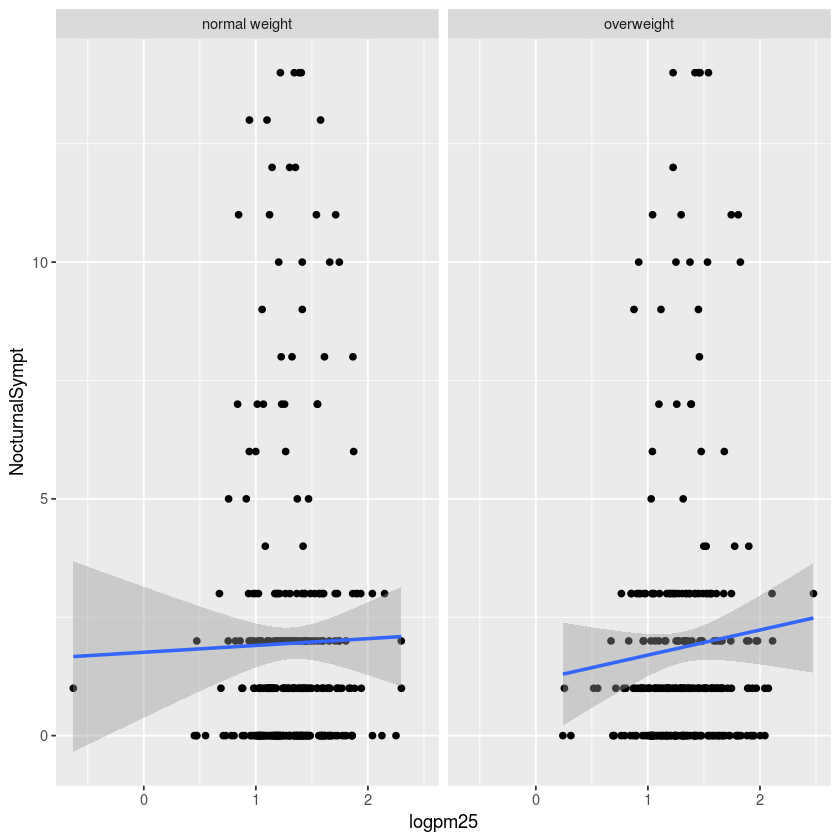

In [72]:
g + geom_point() + facet_grid(. ~ bmicat) + geom_smooth(method = 'lm')

### Annotation
- `xlab(), ylab(), labs(), ggtitle()`
- Each of the 'geom' functions has options to modify
- For things that only make sense globally, use `theme()`
    - Example: `theme(legend.position = 'none')`
- 2 standard appearance themes are included
    - `theme_gray()`: the default theme (gray background)
    - `theme_bw()`: more stark/plain

### Modifying Aesthetics

Warning message:
“Removed 134 rows containing missing values (geom_point).”


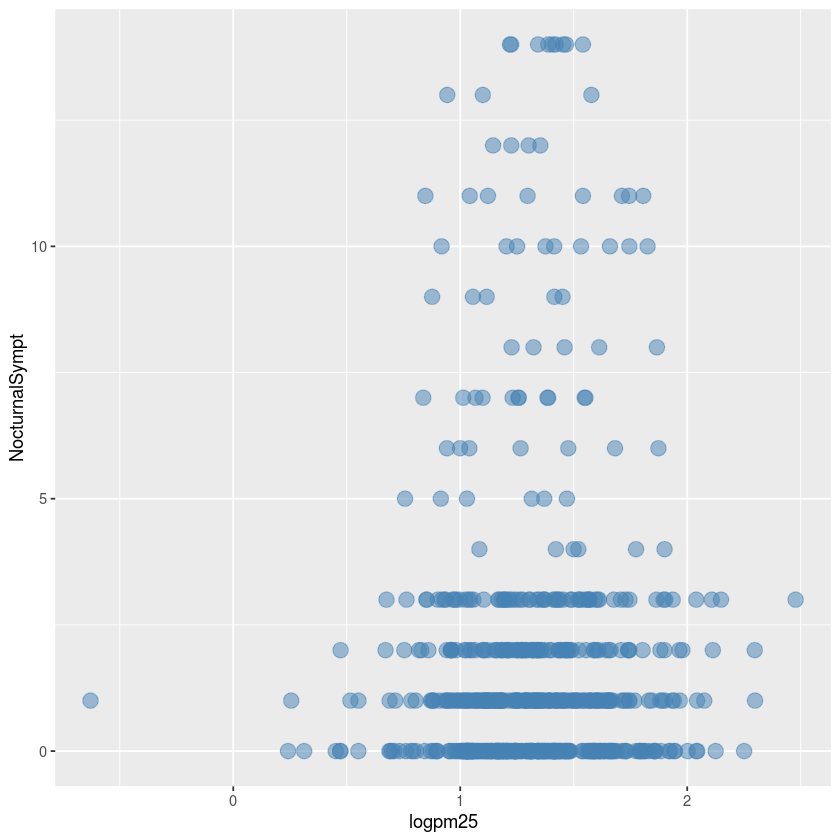

In [73]:
g + geom_point(color = 'steelblue', size = 4, alpha = 1/2)

Warning message:
“Removed 134 rows containing missing values (geom_point).”


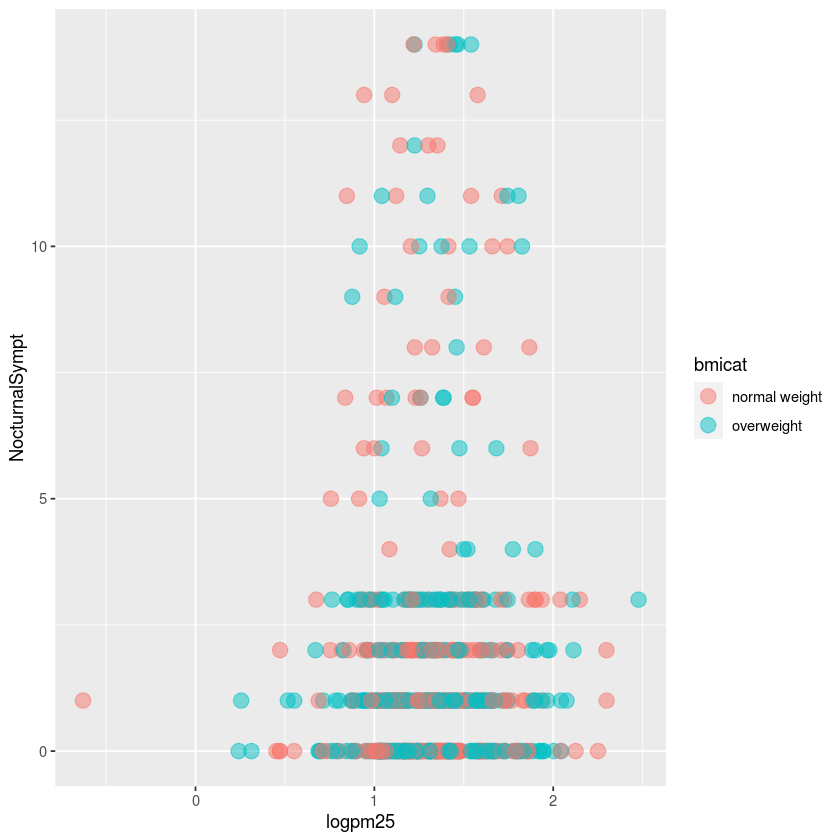

In [74]:
g + geom_point(
    aes(color = bmicat)
    , size = 4
    , alpha = 1/2
)

Warning message:
“Removed 134 rows containing missing values (geom_point).”


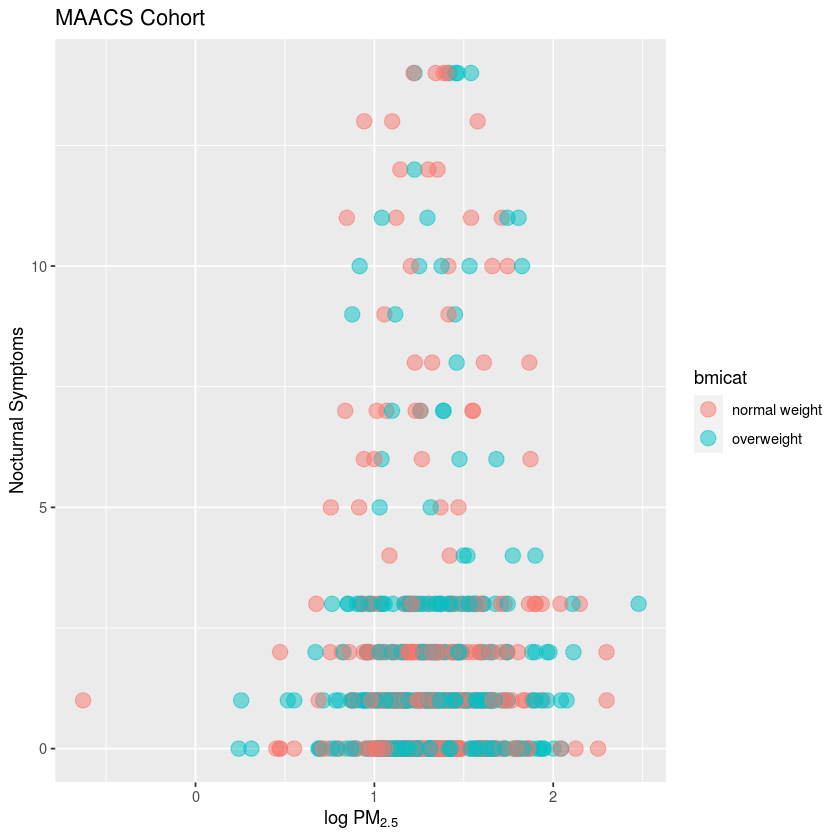

In [77]:
g + geom_point(
    aes(color = bmicat)
    , size = 4
    , alpha = 1/2
) + labs(title = "MAACS Cohort") + labs (x = expression("log " * PM[2.5])) + labs(y = 'Nocturnal Symptoms')

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


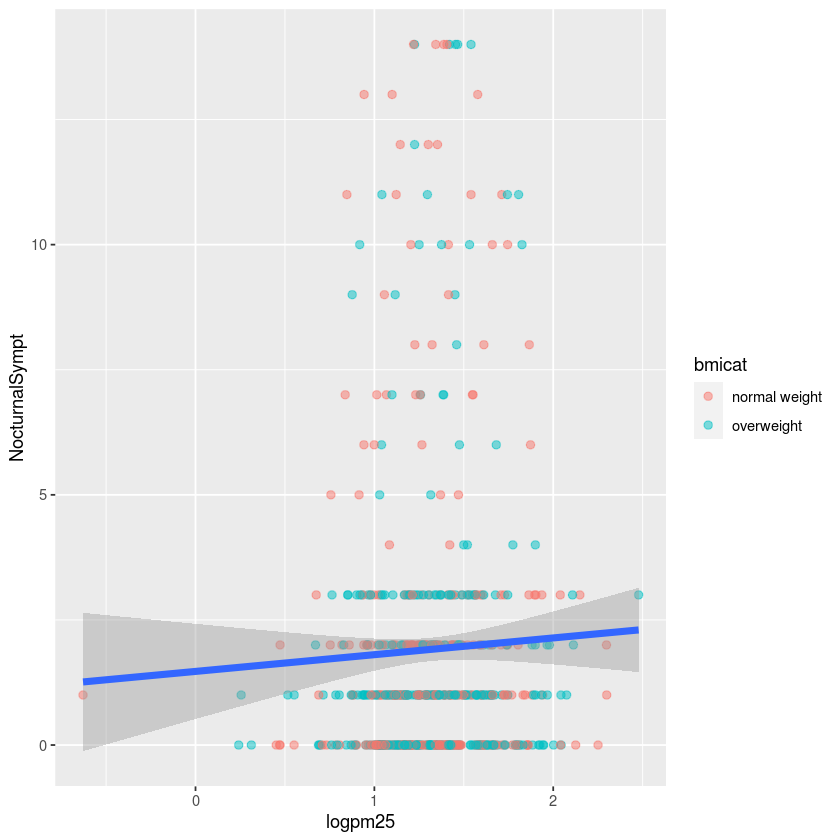

In [82]:
g + geom_point(aes(color = bmicat), size = 2, alpha = 1/2) + geom_smooth(method = 'lm', size = 2, linetype = 1, se = TRUE)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


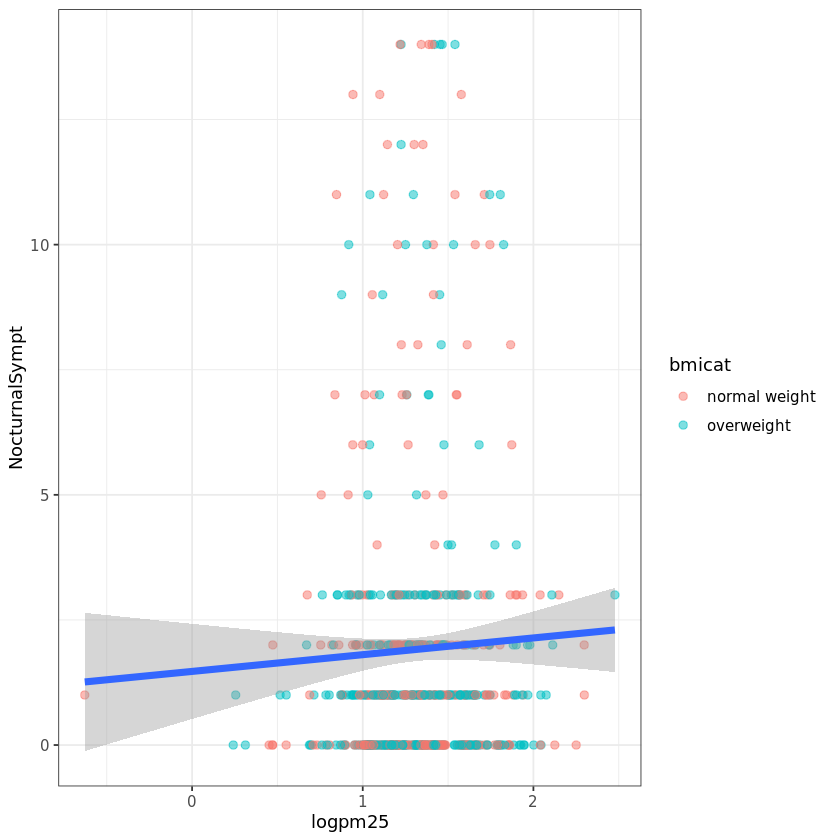

In [84]:
g + geom_point(aes(color = bmicat), size = 2, alpha = 1/2) + geom_smooth(method = 'lm', size = 2, linetype = 1, se = TRUE) + theme_bw(base_family = "STHeiti")

### Axis Limits

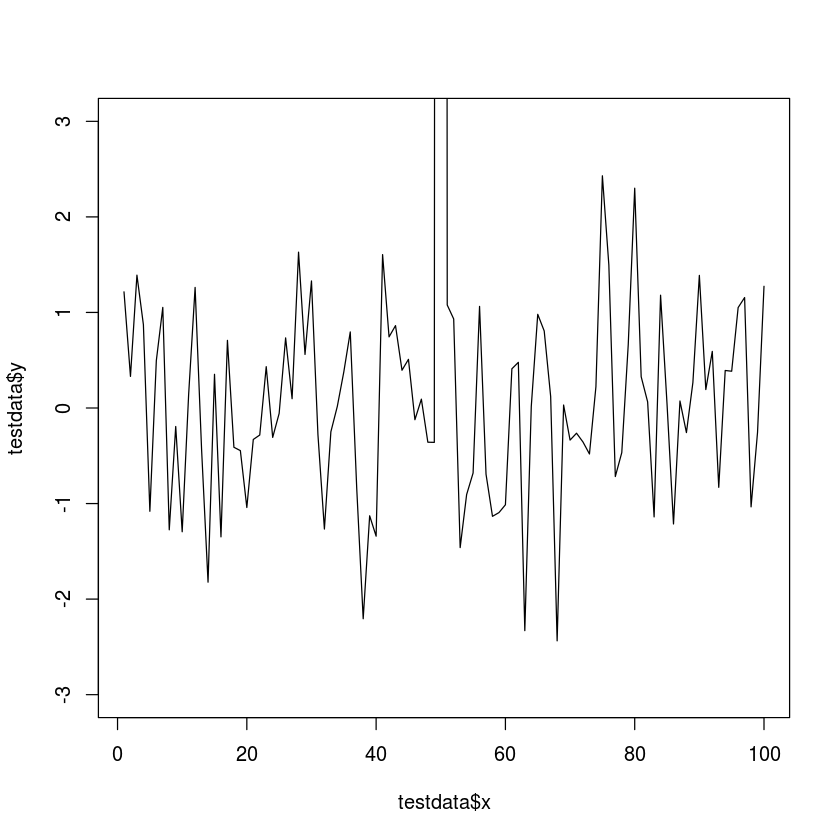

In [85]:
testdata <- data.frame(x = 1:100, y = rnorm(100))
testdata[50,2] <- 100 # outlier
plot(testdata$x, testdata$y, type = 'l', ylim = c(-3,3))

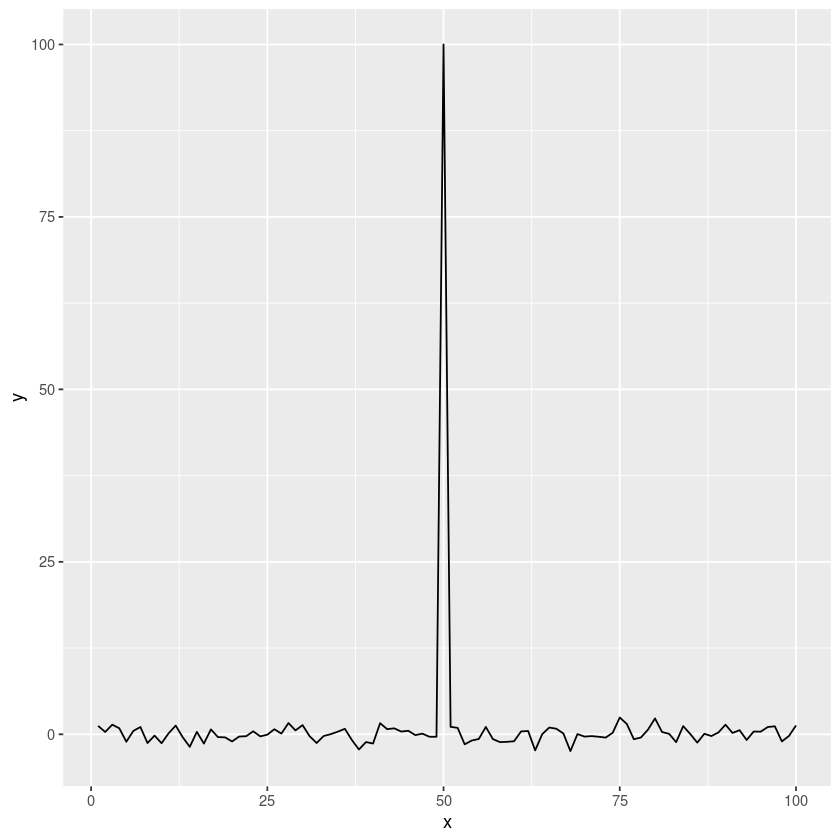

In [89]:
g <- ggplot(testdata, aes (x = x, y = y))
g + geom_line()

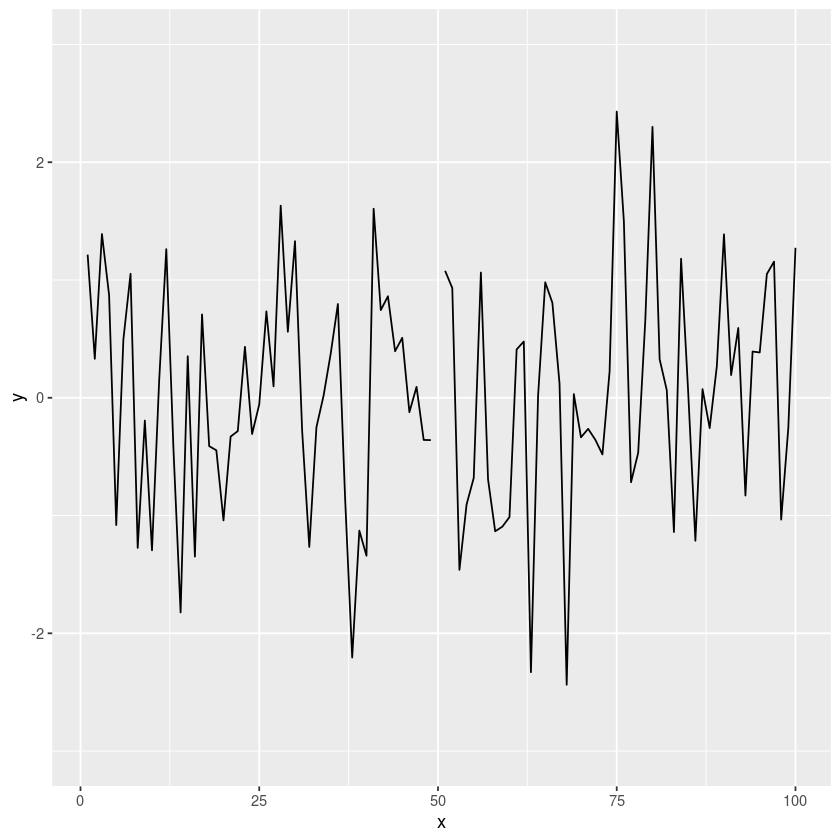

In [90]:
g + geom_line() + ylim(-3,3) # outlier missing

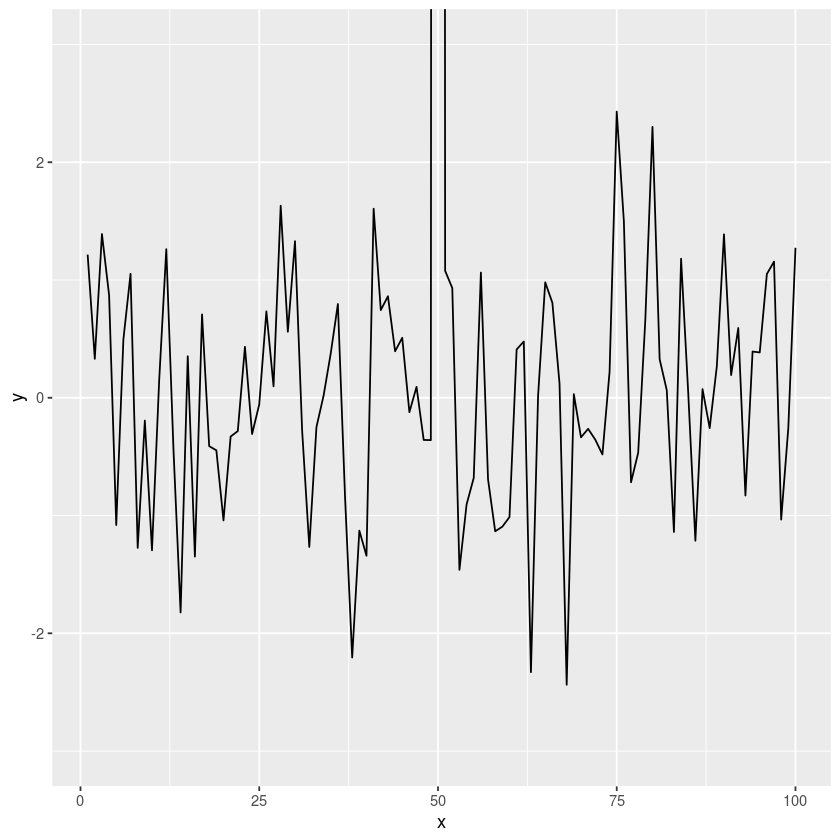

In [92]:
g + geom_line() + coord_cartesian(ylim = c(-3,3)) # outlier included

### More complex example

- How does the relationship between PM2.5 and nocturnal symptoms vary by BMI and NO2?

- Unlike our previous BMI variable, NO2 is continuous

- We need to make NO2 categorical so we can condition on it in the plotting
    - Use the `cut()` function for this

In [95]:
# calculate the deciles of the data
cutpoints <- quantile(maacs$logno2_new, seq(0, 1, length = 4), na.rm = TRUE)

In [98]:
# cut the data at the deciles and craete a new factor variable
maacs$no2dec <- cut(maacs$logno2_new, cutpoints)

In [100]:
# see the levels of the newly created factor variable
# levels(maacs$bmicat)
levels(maacs$no2dec)

[1] "(-0.629,1.18]" "(1.18,1.44]"   "(1.44,2.48]"

In [101]:
summary(maacs$logno2_new)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.6289  1.1224  1.3133  1.3254  1.5573  2.4775     143 

In [103]:
names(maacs)

[1] "id"             "eno"            "duBedMusM"      "pm25"          
 [5] "mopos"          "logpm25"        "NocturnalSympt" "bmicat"        
 [9] "logno2_new"     "no2dec"

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 134 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 134 rows containing missing values (geom_point).”


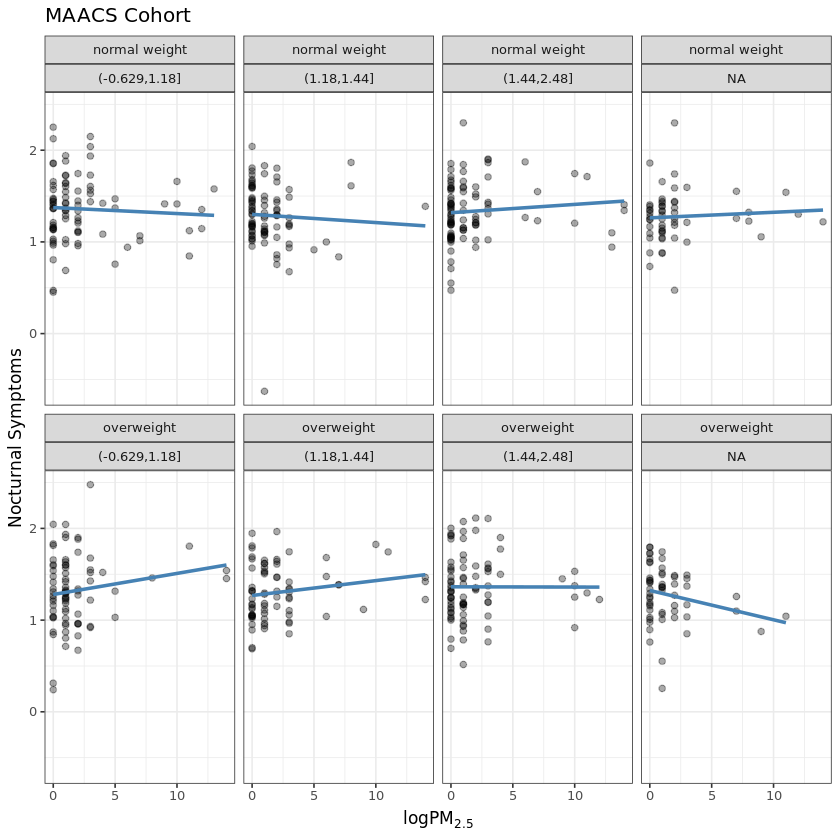

In [116]:
g <- ggplot(maacs, aes(x = NocturnalSympt, y=logpm25))
# g + geom_point(aes(color = bmicat), size = 2, alpha = 1/2) + facet_grid(. ~ bmicat) + geom_smooth(method = 'lm')
g <- g + geom_point(alpha = 1/3)
g <- g + facet_wrap(bmicat ~ no2dec, nrow = 2, ncol = 4)
g <- g + geom_smooth(method = 'lm', se = FALSE, col = 'steelblue')
g <- g + theme_bw(base_family = 'Avenir', base_size = 10)
g <- g + labs(x = expression('log' * PM[2.5]))
g <- g + labs(y = "Nocturnal Symptoms")
g <- g + labs(title = "MAACS Cohort")
g

## Week 2 Quiz

In [123]:
#install.packages("nlme")
library("nlme")
library("lattice")
xyplot(Weight ~ Time | Diet, BodyWeight)

ERROR: Error in value[[3L]](cond): Package ‘nlme’ version 3.1.147 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘nlme’ is imported by ‘mgcv’ so cannot be unloaded



ERROR: Error in eval(expr, envir, enclos): object 'Diet' not found
